In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
stdtypes = {'Store_Number':str,'Vendor_Number':str,'Item_Number':str, 'Category':str,
            'Zip_Code':str}

In [5]:
store_trans_cluster = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_trans_cluster.csv', dtype=stdtypes,index_col=0 )

In [6]:
store_trans_cluster.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Vendor_Number,Item_Number,Category,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,035,88296,1022200,Patron Silver,750,41.522231,144787,Popular_Bottles,6001266.0,1274,Tequila
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,035,88296,1022200,Patron Silver,750,41.522231,144787,Popular_Bottles,6001266.0,1274,Tequila
2,5566,East End Liquor & Tobacco,3804 Hubbell Ave,Des Moines,50317,POINT (-93.541351 41.630849),77,POLK,035,88296,1022200,Patron Silver,750,41.522231,144787,Popular_Bottles,6001266.0,1274,Tequila
3,4755,Walgreens #05941 / Mason City,1251 4th St SW,Mason City,50401,POINT (-93.220422 43.148333),17,CERRO GORD,035,88296,1022200,Patron Silver,750,41.522231,144787,Popular_Bottles,6001266.0,1274,Tequila
4,5167,New Star Liquor & Tobacco / Ft Dodg,1724 5th Ave S,Fort Dodge,50501,POINT (-94.173816 42.501131),94,WEBSTER,035,88296,1022200,Patron Silver,750,41.522231,144787,Popular_Bottles,6001266.0,1274,Tequila


In [7]:
orders_per_item_df = store_trans_cluster.groupby(['Item_Number']).agg({'Item_Description':'count'}).reset_index()

In [8]:
orders_per_item_df.columns = ['Item_Number', 'orders']

In [9]:
orders_per_item_df.head()

,Item_Number,orders
0,10006,735
1,100077,236
2,10008,2124
3,10009,296
4,100148,158


In [10]:
cluster_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters.csv',dtype={'Item_Number':str}, index_col=0)


In [11]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 1 to 4457
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4301 non-null   object 
 1   Item_Description    4301 non-null   object 
 2   Bottle_Volume       4301 non-null   int64  
 3   Bottle_Retail       4301 non-null   float64
 4   Bottles_Sold        4301 non-null   int64  
 5   cluster_name        4301 non-null   object 
 6   revenue             4301 non-null   float64
 7   Num_Stores_Selling  4301 non-null   int64  
 8   New_Category_Name   4301 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 336.0+ KB


In [12]:
new_cluster_data = cluster_data.merge(orders_per_item_df)

In [13]:
new_cluster_data.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,New_Category_Name,orders
0,10006,Scoresby Rare Scotch,750,7.70,4619,Most_Variety,35566.30,197,Scotch,735
1,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Most_Variety,42006.72,136,Temporary & Specialty Packages,236
2,10009,Scoresby Rare Scotch,1000,10.11,1722,Most_Variety,17409.42,70,Scotch,296
3,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Moderately_High,25082.34,120,Temporary & Specialty Packages,158
4,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Most_Variety,78178.40,149,Temporary & Specialty Packages,234


In [14]:
new_cluster_data.cluster_name.value_counts()

Most_Variety         2199
Moderately_High       877
Volume_For_Dollar     454
Quick_Shots           436
High_End              157
Cheap                 136
Popular_Bottles        42
Name: cluster_name, dtype: int64

In [15]:
new_cluster_data.orders.corr(new_cluster_data.Bottle_Volume)

0.05078745638821658

In [16]:
new_cluster_data.orders.corr(new_cluster_data.Bottle_Retail)

-0.14379666326523008

In [17]:
new_cluster_data.orders.corr(new_cluster_data.Bottles_Sold)

0.8675559679618167

In [18]:
most_variety = new_cluster_data.loc[new_cluster_data.cluster_name =='Most_Variety',['Bottle_Volume','Bottle_Retail','orders','Item_Number']]

In [19]:
most_variety = most_variety.set_index('Item_Number')

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [32]:
most_variety[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'orders_scaled' ]] = scaler.fit_transform\
                                           (most_variety[['Bottle_Volume','Bottle_Retail','orders'] ])
                                                   


In [33]:
linkage_df = linkage_frame(most_variety[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'orders_scaled' ]])

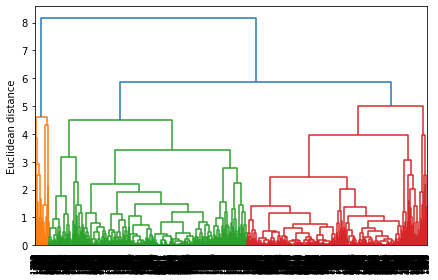

In [34]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

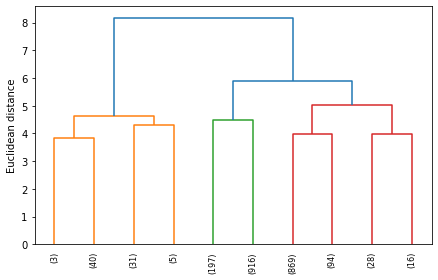

In [36]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p = 10, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [24]:
linkage_df

,row label 1,row label 2,distance,no. items in clust.
cluster 1,4.0,1622.0,0.000000,2.0
cluster 2,1353.0,2118.0,0.000000,2.0
cluster 3,1563.0,1637.0,0.000000,2.0
cluster 4,2033.0,2035.0,0.000000,2.0
cluster 5,2042.0,2202.0,0.000000,3.0
...,...,...,...,...
cluster 2194,4387.0,4388.0,1180.085273,132.0
cluster 2195,4389.0,4391.0,1291.621574,2038.0
cluster 2196,4386.0,4390.0,1356.000207,29.0
cluster 2197,4392.0,4393.0,2415.045571,2170.0
